In [1]:
import numpy as np
np.set_printoptions(2, suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import scale
import gdown
import zipfile

# Implementing a Neural Net with a Gardening Dataset
This example is to create a network by using pure Python and Numpy which determines optimal conditions for fostering plants, given exposure to sunshine and exposure to water.

Hence, the available dataset has two features (exposure to sunshine and exposure to water) and one output variable, which shows whether the ratio was healthy for a general flower or not.

*Disclaimer*: The dataset is dummy data and not neccessarily correct.

### Load data

In [10]:
# download google drive's zip folder to machine
!gdown 14nCQrUeCD0QyseWSZA4PaRYYYKLorKf6

In [7]:
# unzip folder to load data
zip_file = zipfile.ZipFile("DL03_files.zip")
zip_file.extractall()
zip_file.close()

In [3]:
features = np.load("features.npy")
targets = np.load("targets.npy")

### Visualize raw data

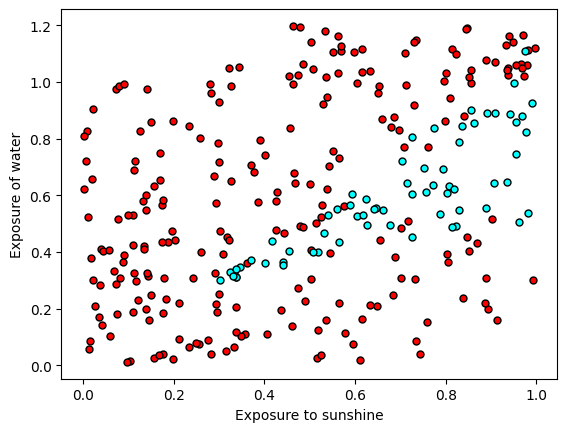

Features:
 [[0.6  1.  ]
 [0.52 0.13]
 [0.73 0.45]
 [0.96 0.51]
 [0.33 0.06]]
Target:
 [[0]
 [0]
 [1]
 [1]
 [0]]
Array shape of Features:  (300, 2)
Array shape of Targets:  (300, 1)


In [4]:
# Function to help us plot
def plot_points():
    X = np.array(features)
    y = np.array(targets)
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Exposure to sunshine')
    plt.ylabel('Exposure of water')
    # plt.title('Scatter plot of healthy vs unhealthy Flower data')

# Plotting the points
plot_points()
plt.show()
print("Features:\n", features[:5])
print("Target:\n", targets[:5])
print("Array shape of Features: ", features.shape)
print("Array shape of Targets: ", targets.shape)

In [5]:
#setting sigmoid function as activition function
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def sigmoid_prime(x):
    return (sigmoid(x) * (1 - sigmoid(x)))

In [6]:
#randomly initializing weight
weights_input_hidden = np.array([[0.8, 0.4, 0.3], [0.2, 0.9, 0.5]])
weights_hidden_output = np.array([[0.3, 0.5, 0.9]]).transpose()

### Dummy: one iteration with one sample

1. Forward Pass with random initialized weights
2. Backward Pass (Backpropagation) to update weights
3. Forward Pass with updated weights

In [4]:
#one sample data
feature1 = np.array([[1.0, 1.0]])
target1 = np.array([[0.0]])

print("shape of weight_IH: ", weights_input_hidden.shape)
print("shape of weight_HO: ", weights_hidden_output.shape)
print("shape of feature1: ", feature1.shape)
print("shape of target1: ", target1.shape)

shape of weight_IH:  (2, 3)
shape of weight_HO:  (3, 1)
shape of feature1:  (1, 2)
shape of target1:  (1, 1)


In [5]:
#forward pass
hidden_input = feature1 @ weights_input_hidden
hidden_output = sigmoid(hidden_input)
output_input = hidden_output @ weights_hidden_output
output = sigmoid(output_input)

print("shape of hidden_I: ", hidden_input.shape)
print("shape of hidden_O: ", hidden_output.shape)
print("shape of output_I: ", output_input.shape)
print("shape of output: ", output.shape)

shape of hidden_I:  (1, 3)
shape of hidden_O:  (1, 3)
shape of output_I:  (1, 1)
shape of output:  (1, 1)


In [46]:
print("hidden_I: ", hidden_input)
print("hidden_O: ", hidden_output)
print("output_I: ", output_input)
print("output: ", output)

hidden_I:  [[1.  1.3 0.8]]
hidden_O:  [[0.73 0.79 0.69]]
output_I:  [[1.23]]
output:  [[0.77]]


In [6]:
#error computation
learning_rate = 0.5
error = (target1 - output)

print("error: ", error)

error:  [[-0.77]]


In [7]:
#backpropagation
#step1
output_error_term = error * sigmoid_prime(output_input)
#step2
delta_w_h_o = learning_rate * output_error_term * hidden_output.transpose()
weights_hidden_output1 = weights_hidden_output + delta_w_h_o
#step3
hidden_error_term = output_error_term * weights_hidden_output1 * sigmoid_prime(hidden_input).transpose()
#step4
delta_w_i_h = learning_rate * feature1.transpose() * hidden_error_term.transpose()
weights_input_hidden1 = weights_input_hidden + delta_w_i_h

print('shape of output_error_term: ', output_error_term.shape)
print("shape of delta_w_h_o: ", delta_w_h_o.shape)
print("shape of weights_HO1: ", weights_hidden_output1.shape)
print("shape of hidden_error_term: ", hidden_error_term.shape)
print("shape of delta_w_i_h: ", delta_w_i_h.shape)
print("shape of weights_IH1: ", weights_input_hidden1.shape)

shape of output_error_term:  (1, 1)
shape of delta_w_h_o:  (3, 1)
shape of weights_HO1:  (3, 1)
shape of hidden_error_term:  (3, 1)
shape of delta_w_i_h:  (2, 3)
shape of weights_IH1:  (2, 3)


In [49]:
print('output_error_term: ', output_error_term)
print("delta_w_h_o: \n", delta_w_h_o)
print("weights_HO1: \n", weights_hidden_output1)
print("hidden_error_term: \n", hidden_error_term)
print("delta_w_i_h: \n", delta_w_i_h)
print("weights_IH1: \n", weights_input_hidden1)

output_error_term:  [[-0.14]]
delta_w_h_o: 
 [[-0.05]
 [-0.05]
 [-0.05]]
weights_HO1: 
 [[0.25]
 [0.45]
 [0.85]]
hidden_error_term: 
 [[-0.01]
 [-0.01]
 [-0.02]]
delta_w_i_h: 
 [[-0.   -0.01 -0.01]
 [-0.   -0.01 -0.01]]
weights_IH1: 
 [[0.8  0.39 0.29]
 [0.2  0.89 0.49]]


In [32]:
print('Change in weights for hidden layer to output layer: \n', delta_w_h_o, '\n')
print('Change in weights for input layer to hidden layer:\n', delta_w_i_h, '\n')

Change in weights for hidden layer to output layer: 
 [[-0.0495]
 [-0.0532]
 [-0.0467]] 

Change in weights for input layer to hidden layer:
 [[-0.0033 -0.0051 -0.0123]
 [-0.0033 -0.0051 -0.0123]] 



In [8]:
#forward pass with update weight
hidden_input1 = feature1 @ weights_input_hidden1
hidden_output1 = sigmoid(hidden_input1)
output_input1 = hidden_output @ weights_hidden_output1
output1 = sigmoid(output_input1)

print("shape of hidden_I1: ", hidden_input1.shape)
print("shape of hidden_O1: ", hidden_output1.shape)
print("shape of output_I1: ", output_input1.shape)
print("shape of output1: ", output1.shape)

shape of hidden_I1:  (1, 3)
shape of hidden_O1:  (1, 3)
shape of output_I1:  (1, 1)
shape of output1:  (1, 1)


In [51]:
print("hidden_I1: ", hidden_input1)
print("hidden_O1: ", hidden_output1)
print("output_I1: ", output_input1)
print("output1: ", output1)

hidden_I1:  [[0.99 1.29 0.78]]
hidden_O1:  [[0.73 0.78 0.68]]
output_I1:  [[1.12]]
output1:  [[0.75]]


### Computation for the dataset


In [7]:
def forward_pass(inputs):
    hidden_input = inputs @ weights_input_hidden
    hidden_output = sigmoid(hidden_input)
    output_input = hidden_output @ weights_hidden_output
    output_output = sigmoid(output_input)
    return hidden_input, hidden_output, output_input, output_output

def backward_pass(target, hidden_input, output_input, output_output):
    error = (target - output_output)
    output_error_term = error * sigmoid_prime(output_input)
    hidden_error = output_error_term * weights_hidden_output
    hidden_error_term = hidden_error * sigmoid_prime(hidden_input).transpose()
    return hidden_error_term, output_error_term

In [8]:
epochs = 2000
learnrate = [20, 10, 5, 1, 0.5]
n_records, n_features = features.shape

loss_results = []
for lr in learnrate:
    for e in range(epochs):
        del_w_input_hidden = np.zeros(weights_input_hidden.shape)
        del_w_hidden_output = np.zeros(weights_hidden_output.shape)
        for x, y in zip(features, targets):
            x = np.reshape(x,(1,-1))
            hidden_input, hidden_output, output_input, output_output = forward_pass(x)
            hidden_error_term, output_error_term = backward_pass(y, hidden_input, output_input, output_output)
            del_w_hidden_output +=  output_error_term * hidden_output.transpose()
            del_w_input_hidden += x.transpose() * hidden_error_term.transpose()
        # Weight Update
        weights_input_hidden +=  lr * del_w_input_hidden / n_records
        weights_hidden_output += lr * del_w_hidden_output / n_records

    #calculate final loss
    _, hidden_output, _, output_output = forward_pass(features)
    loss = np.mean((np.subtract(targets, output_output)) ** 2)
    loss_results.append((lr, loss))
    print("Learning rate: ", lr, ", Final loss: ", loss)

best_lr = min(loss_results, key=lambda x: x[1])
print("Best learning rate: ", best_lr[0], ", with loss: ", best_lr[1])

Learning rate:  20 , Final loss:  0.0579821448765388
Learning rate:  10 , Final loss:  0.05670960899423171
Learning rate:  5 , Final loss:  0.05634325886448733
Learning rate:  1 , Final loss:  0.05627941175868976
Learning rate:  0.5 , Final loss:  0.056248435246435746
Best learning rate:  0.5 , with loss:  0.056248435246435746


In [9]:
epochs = 1000
learnrate = .01
n_records, n_features = features.shape

for e in range(epochs):
    del_w_input_hidden = np.zeros(weights_input_hidden.shape)
    del_w_hidden_output = np.zeros(weights_hidden_output.shape)

    for x, y in zip(features, targets):
        x = np.reshape(x,(1,-1))
        hidden_input, hidden_output, output_input, output_output = forward_pass(x)
        hidden_error_term, output_error_term = backward_pass(y, hidden_input, output_input, output_output)

        del_w_hidden_output +=  output_error_term * hidden_output.transpose()
        del_w_input_hidden += x.transpose() * hidden_error_term.transpose()

    # Weight Update
    weights_input_hidden +=  learnrate * del_w_input_hidden / n_records
    weights_hidden_output += learnrate * del_w_hidden_output / n_records
    _, hidden_output, _, output_output = forward_pass(features)

    if e % (epochs / 10) == 0:
        loss = np.mean((np.subtract(targets, output_output)) ** 2)
        print("Interation:", e, ", Current Loss:", loss)

Interation: 0 , Current Loss: 0.05624843493969158
Interation: 100 , Current Loss: 0.056248404265575806
Interation: 200 , Current Loss: 0.05624837359205543
Interation: 300 , Current Loss: 0.05624834291913042
Interation: 400 , Current Loss: 0.05624831224680077
Interation: 500 , Current Loss: 0.056248281575066436
Interation: 600 , Current Loss: 0.0562482509039274
Interation: 700 , Current Loss: 0.056248220233383654
Interation: 800 , Current Loss: 0.05624818956343513
Interation: 900 , Current Loss: 0.05624815889408183


In [10]:
# Test the network
print()
print("Final Test")
print("________________________________________________________________")
loss = np.mean((np.subtract(targets, output_output)) ** 2)
print("Interation:", epochs, ", Current Loss:", loss)

print()
print('weights_input_hidden:\n', weights_input_hidden, '\n')
print('weights_hidden_output:\n', weights_hidden_output, '\n')


Final Test
________________________________________________________________
Interation: 1000 , Current Loss: 0.05624812853200836

weights_input_hidden:
 [[  8.02 -16.96   1.3 ]
 [-16.68  15.52  -2.18]] 

weights_hidden_output:
 [[-16.04]
 [ -6.69]
 [  7.82]] 



In [11]:
#prediction
test_sample_1 = np.array([[1, 0.8]])
test_sample_2 = np.array([[0.8, 0.1]])
test_sample_3 = np.array([[0.5, 0.3]])

_, _, _, erg1 = forward_pass(test_sample_1)
_, _, _, erg2 = forward_pass(test_sample_2)
_, _, _, erg3 = forward_pass(test_sample_3)

print("Sample 1 (Should be clearly 1) - Predicted:", erg1)
print("Sample 2 (Should be clearly 0) - Predicted:", erg2)
print("Sample 3 (Difficult to predict) - Predicted:", erg3)

Sample 1 (Should be clearly 1) - Predicted: [[0.95]]
Sample 2 (Should be clearly 0) - Predicted: [[0.]]
Sample 3 (Difficult to predict) - Predicted: [[0.36]]


In [12]:
print('predicted output: \n', output_output[:5])
print("target output: \n", targets[:5])

predicted output: 
 [[0.01]
 [0.  ]
 [0.81]
 [0.27]
 [0.  ]]
target output: 
 [[0]
 [0]
 [1]
 [1]
 [0]]


In [15]:
def plot_predictions():
    _, hidden_output, _, output_output = forward_pass(features)
    predictions = (output_output > 0.5).astype(int)  # thresholded predictions

    X = np.array(features)
    predicted_yes = X[np.argwhere(predictions==1)]
    predicted_no = X[np.argwhere(predictions==0)]
    plt.scatter([s[0][0] for s in predicted_no], [s[0][1] for s in predicted_no], s=25, color='red', edgecolor='k')
    plt.scatter([s[0][0] for s in predicted_yes], [s[0][1] for s in predicted_yes], s=25, color='yellow', edgecolor='k')

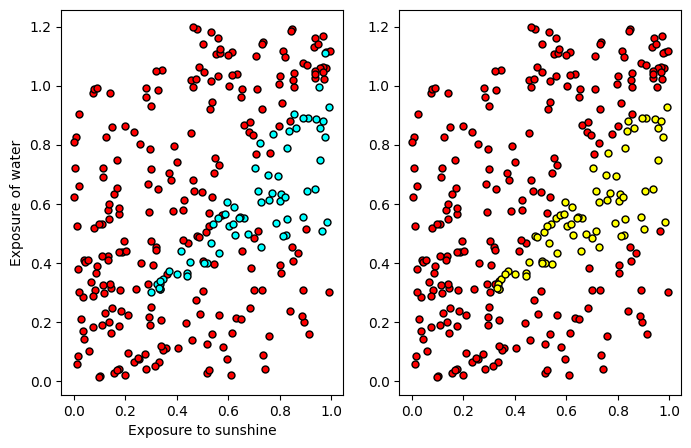

In [19]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plot_points()
plt.subplot(1, 2, 2)
plot_predictions()

plt.show()

**we can see a very few misclassification for this data, in this model. This simple perceptron works well may because of the small number of features and data.**

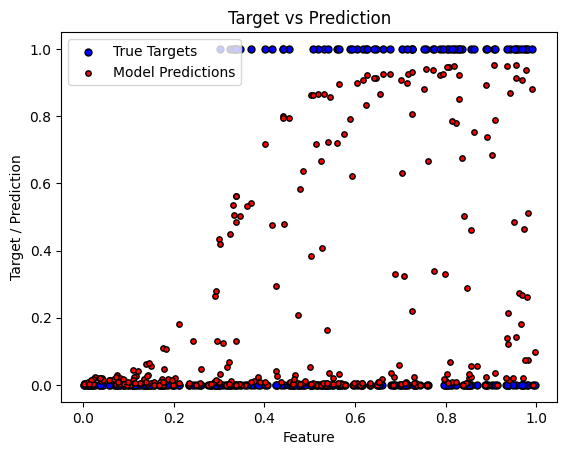

In [24]:
_, hidden_output, _, output_output = forward_pass(features)
true_y = targets.flatten()
pred_y = output_output.flatten()

if features.shape[1] == 1:
    x_vals = features.flatten()
else:
    x_vals = features[:, 0]

plt.scatter(x_vals, true_y, label='True Targets', color='blue', s=25, edgecolor = 'k')
plt.scatter(x_vals, pred_y, label='Model Predictions', color='red', s=15, edgecolor = 'k')
plt.xlabel('Feature')
plt.ylabel('Target / Prediction')
plt.title('Target vs Prediction')
plt.legend(loc='upper left')
plt.show()